In [1]:
import pandas as pd

data = pd.read_csv("C:/Users/eduar/OneDrive/Documents/UAS_DM ARDUS/diabetes.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.fillna(data.mean(), inplace=True)

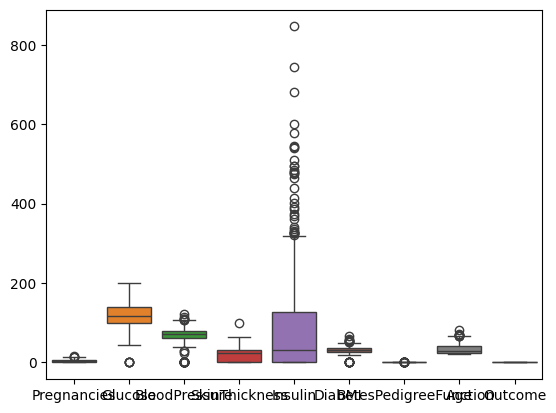

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)
plt.show()

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Outcome'] = label_encoder.fit_transform(data['Outcome'])

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

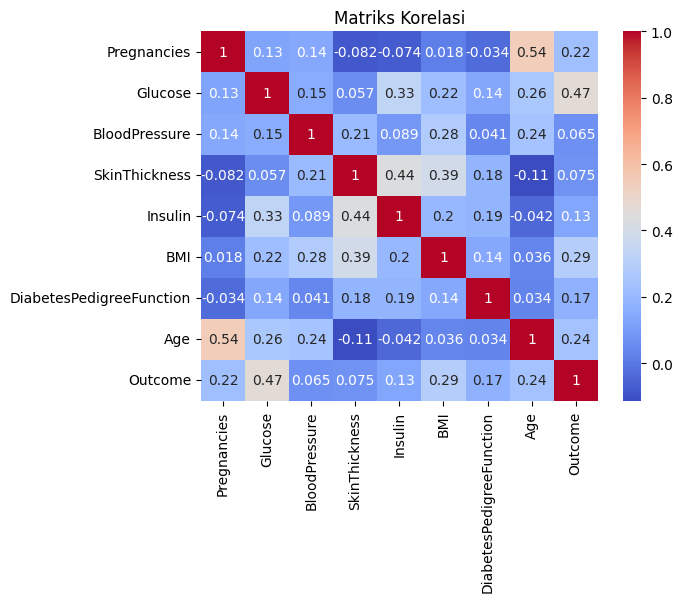

In [24]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriks Korelasi")
plt.show()

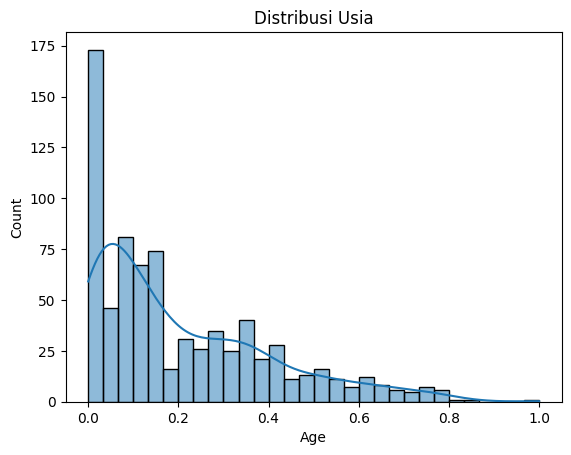

In [25]:
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Distribusi Usia")
plt.show()

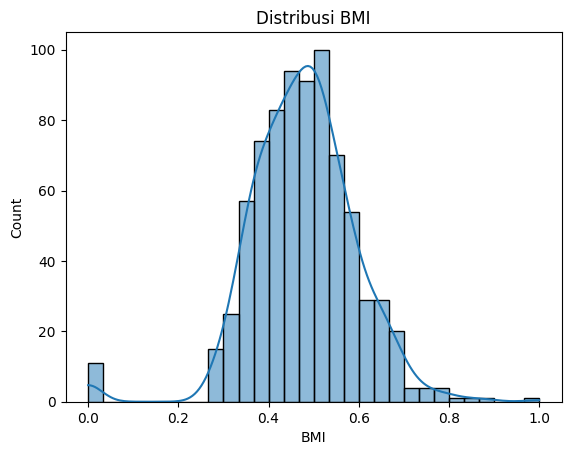

In [26]:
sns.histplot(data['BMI'], kde=True, bins=30)
plt.title("Distribusi BMI")
plt.show()

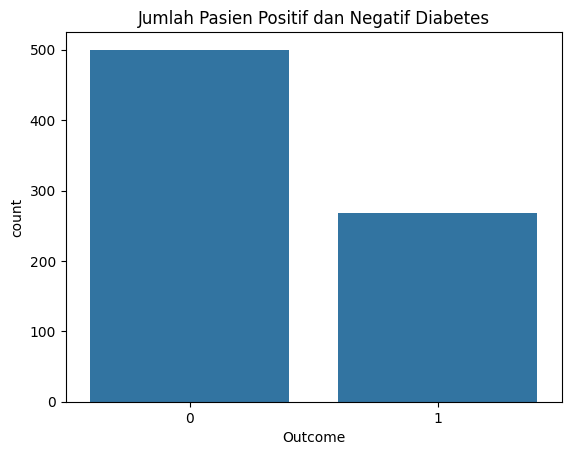

In [27]:
sns.countplot(x='Outcome', data=data)
plt.title('Jumlah Pasien Positif dan Negatif Diabetes')
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred_lr = model.predict(X_test)

In [65]:
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f'MSE: {mse}, R²: {r2}')

MSE: 0.17104527280850104, R²: 0.25500281176741757


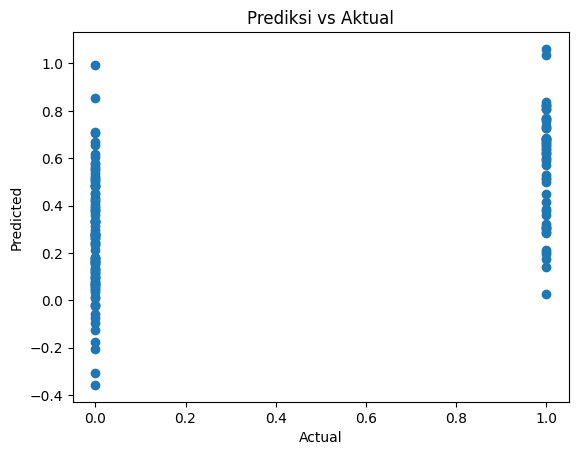

In [66]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediksi vs Aktual')
plt.show()

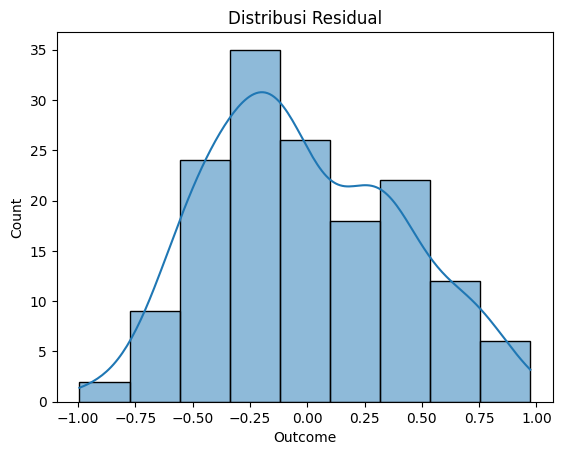

In [67]:
residuals = y_test - y_pred_lr
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual')
plt.show()

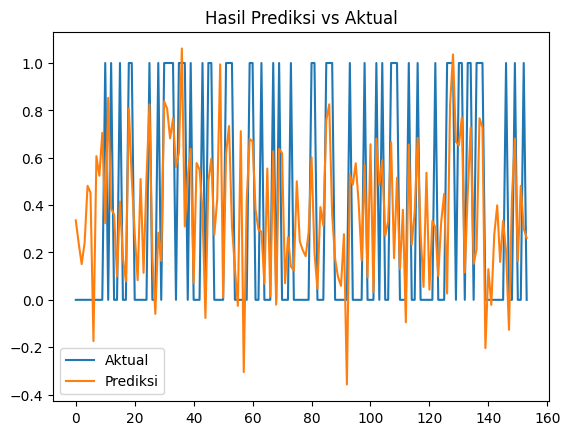

In [68]:
plt.plot(y_test.values, label='Aktual')
plt.plot(y_pred_lr, label='Prediksi')
plt.legend()
plt.title('Hasil Prediksi vs Aktual')
plt.show()

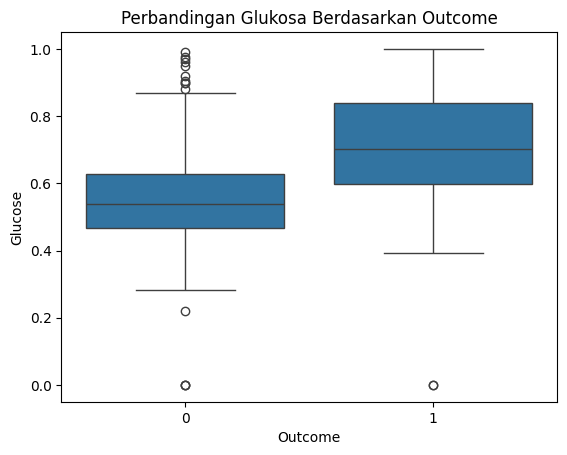

In [69]:
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Perbandingan Glukosa Berdasarkan Outcome')
plt.show()

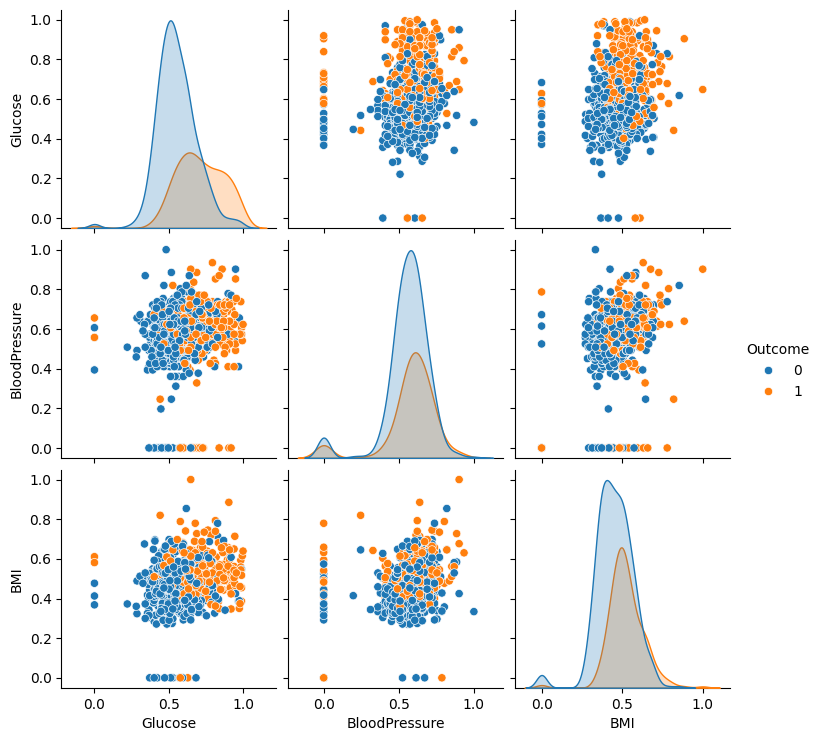

In [70]:
sns.pairplot(data, hue='Outcome', vars=['Glucose', 'BloodPressure', 'BMI'])
plt.show()

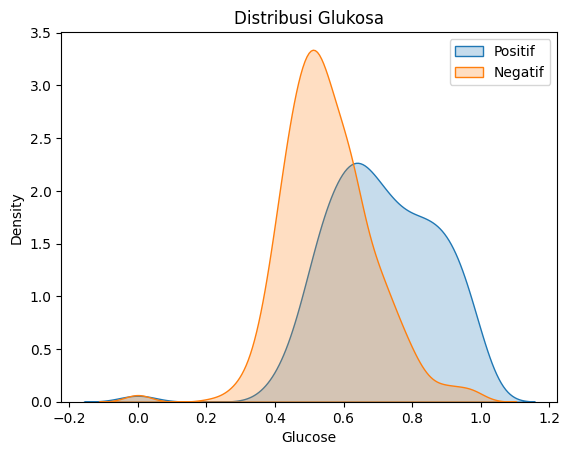

In [61]:
positive = data[data['Outcome'] == 1]
negative = data[data['Outcome'] == 0]
sns.kdeplot(positive['Glucose'], label='Positif', fill=True)
sns.kdeplot(negative['Glucose'], label='Negatif', fill=True)
plt.title('Distribusi Glukosa')
plt.legend()
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.4f}')

Akurasi: 0.7662


In [76]:
cm = confusion_matrix(y_test, y_pred)

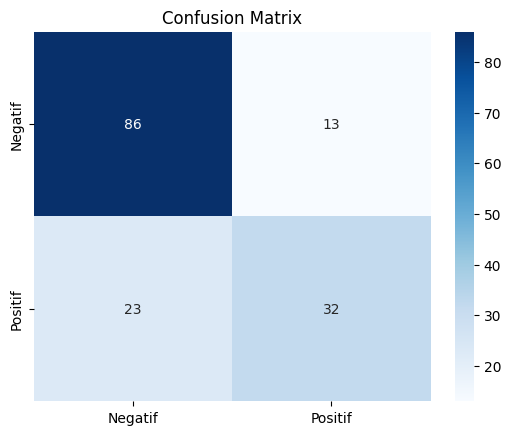

In [77]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.title("Confusion Matrix")
plt.show()

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



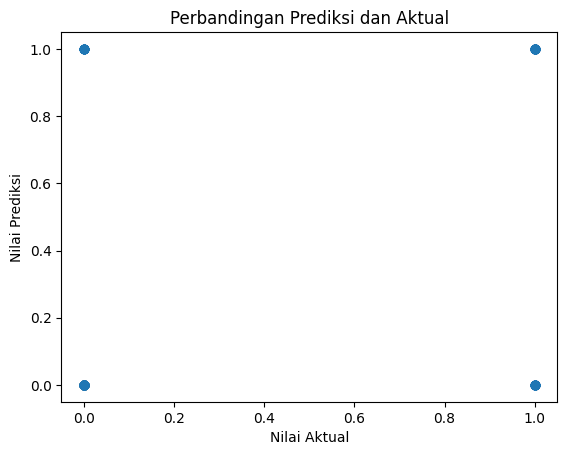

In [80]:
plt.scatter(y_test, y_pred)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Prediksi dan Aktual')
plt.show()

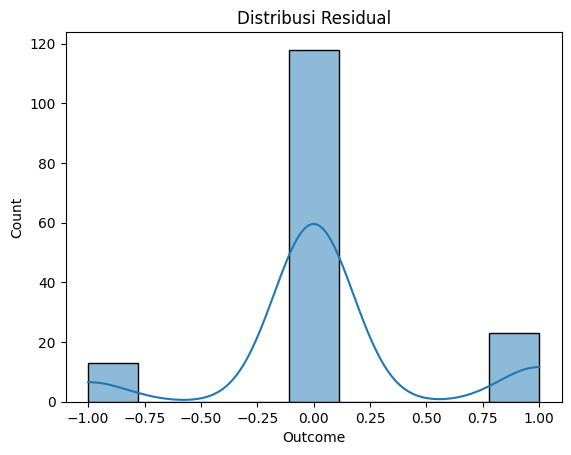

In [81]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residual")
plt.show()

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f'Accuracy: {scores.mean():.4f}')

Accuracy: 0.7644


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 10}


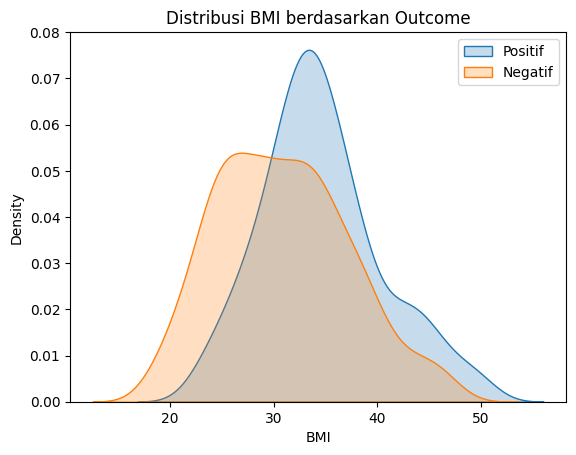

In [47]:
sns.kdeplot(df[df['Outcome'] == 1]['BMI'], label='Positif', fill=True)
sns.kdeplot(df[df['Outcome'] == 0]['BMI'], label='Negatif', fill=True)
plt.title('Distribusi BMI berdasarkan Outcome')
plt.legend()
plt.show()

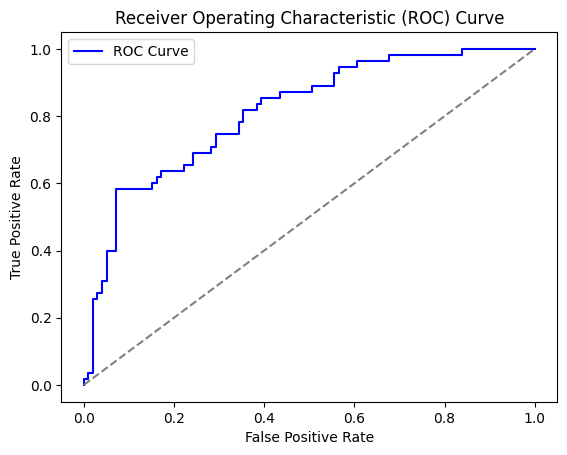

In [51]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'AUC: {auc:.4f}')

AUC: 0.8129
